# Assignment 9

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats as st
import seaborn as sns

#### 1) load the data

In [12]:
salaries = pd.read_csv('Predicting_Salaries.csv')
sal_arr = salaries.to_numpy()
# salaries

# create columns object
col_obj = salaries.columns  

cols = []  
# iterate through col_obj to make list for graph titles
for col in col_obj:
    cols.append(col)

#### 2) general data shape analysis

In [71]:
# show summary
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   YearsOfExperience  100 non-null    float64
 1   AnnualSalary       100 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [14]:
# show summary
salaries.describe()

,YearsOfExperience,AnnualSalary
count,100.000000,100.000000
mean,5.775000,80518.630000
std,3.621188,33885.794214
min,0.100000,30100.000000
25%,2.625000,48337.250000
50%,5.800000,81008.000000
75%,8.850000,109814.500000
max,12.000000,141230.000000


In [15]:
# show head
salaries.head()

,YearsOfExperience,AnnualSalary
0,0.1,30100
1,0.1,32209
2,0.3,31880
3,0.4,33342
4,0.5,32308


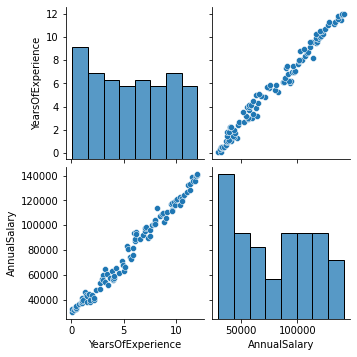

In [70]:
# show histogram and scatter plot
p = sns.pairplot(salaries)

#### Assumption check

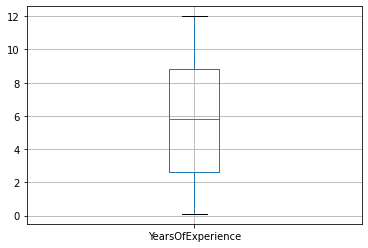

In [68]:
# checking for outliers
salaries.boxplot(column="YearsOfExperience")

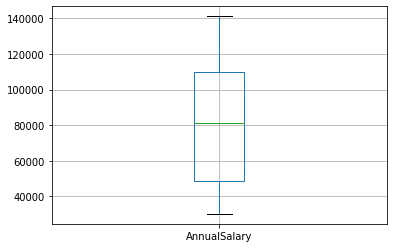

In [72]:
# checking for outliers
salaries.boxplot(column="AnnualSalary")

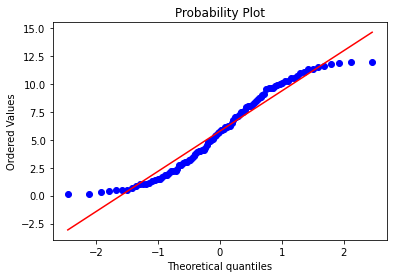

In [20]:
# Q-Q plot to check for normality - Years of Experience

st.probplot(sal_arr[:,0], dist="norm", plot=plt)         
plt.show()

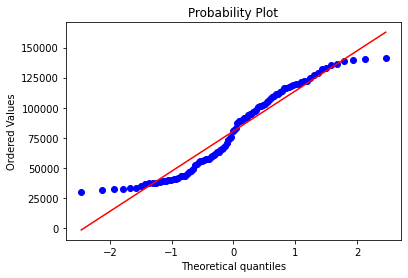

In [21]:
# Q-Q plot to check for normality - Annual Salary

st.probplot(sal_arr[:,1], dist="norm", plot=plt)         
plt.show()

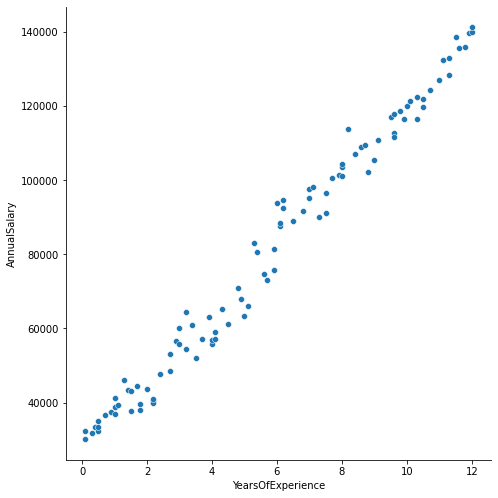

In [73]:
# looking at linearity
p = sns.pairplot(salaries, x_vars='YearsOfExperience', y_vars='AnnualSalary', height=7, aspect=1)

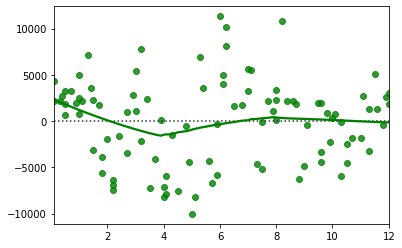

In [74]:
# check residuals
sns.residplot(x=x, y=y, lowess=True, color="g")

In [75]:
# checking correlation
corr = salaries.corr()
corr.style.background_gradient(cmap='coolwarm')

,YearsOfExperience,AnnualSalary
YearsOfExperience,1.000000,0.990893
AnnualSalary,0.990893,1.000000


### Assumption summary
1. Variables are independent - True
2. Normally distributed - True
3. Linearity - True
4. Homoscedasticity  - True

#### Show linear regression model and model statistics

In [82]:
# send x and y values to np array to push into LR model
x = salaries.iloc[:,0].values.reshape(-1,1)
y = salaries.iloc[:,1].values.reshape(-1,1)

lin_reg = LinearRegression()
lin_reg.fit(x, y)

LinearRegression()

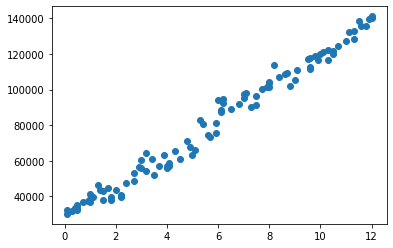

In [84]:
# show points
plt.scatter(x, y)
plt.show()

#### get and display predicted values

In [85]:
# model prediction
y_pred = lin_reg.predict(x)
print('Predicted response:', y_pred, sep='\n')

Predicted response:
[[ 27897.61180685]
 [ 27897.61180685]
 [ 29752.09702951]
 [ 30679.33964085]
 [ 31606.58225218]
 [ 31606.58225218]
 [ 31606.58225218]
 [ 33461.06747484]
 [ 35315.55269751]
 [ 36242.79530884]
 [ 36242.79530884]
 [ 36242.79530884]
 [ 37170.03792018]
 [ 39024.52314284]
 [ 39951.76575418]
 [ 40879.00836551]
 [ 40879.00836551]
 [ 42733.49358818]
 [ 43660.73619951]
 [ 43660.73619951]
 [ 45515.22142218]
 [ 47369.70664484]
 [ 47369.70664484]
 [ 47369.70664484]
 [ 49224.19186751]
 [ 52005.91970151]
 [ 52005.91970151]
 [ 53860.40492417]
 [ 54787.64753551]
 [ 54787.64753551]
 [ 56642.13275817]
 [ 56642.13275817]
 [ 58496.61798084]
 [ 59423.86059217]
 [ 61278.34581484]
 [ 63132.8310375 ]
 [ 64060.07364884]
 [ 64060.07364884]
 [ 64987.31626017]
 [ 64987.31626017]
 [ 66841.80148284]
 [ 68696.2867055 ]
 [ 71478.0145395 ]
 [ 72405.25715084]
 [ 73332.49976217]
 [ 74259.7423735 ]
 [ 76114.22759617]
 [ 77041.4702075 ]
 [ 78895.95543017]
 [ 79823.1980415 ]
 [ 81677.68326417]
 [ 81677.68

#### model easy

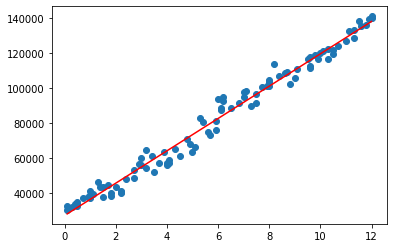

In [86]:
plt.scatter(x, y)
plt.plot(x, y_pred, color="red")

#### model complex

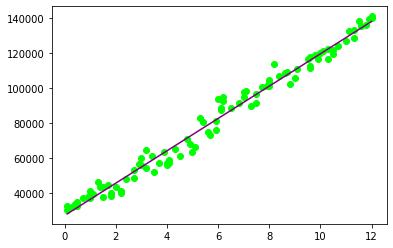

In [43]:
def my_func(new_x):
    return (lin_reg.coef_ * new_x) + lin_reg.intercept_

my_model = list(map(my_func, x))
model_vals = []
for val in my_model:
    model_vals.append(float(val))

plt.scatter(x, y, color="lime")
plt.plot(x, model_vals, color="purple")
plt.show()

#### model analysis

In [89]:
r_sq = round(lin_reg.score(x, y), 4)
print(f"Coeff. of determination: {r_sq}")
print(f"Intercept: {lin_reg.intercept_}")
print(f"Slope: {lin_reg.coef_}")

dist = lin_reg.intercept_ + (lin_reg.coef_ * x)

Coeff. of determination: 0.9819
Intercept: [26970.36919551]
Slope: [[9272.42611333]]


In [88]:
x2 = sm.add_constant(x)
# OLS requires a column of 1s (re: add_constant)
est = sm.OLS(dist, x2)
est2 = est.fit()
print(est2.summary())
# print(x2)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.155e+31
Date:                Sun, 06 Mar 2022   Prob (F-statistic):               0.00
Time:                        18:23:03   Log-Likelihood:                 2266.9
No. Observations:                 100   AIC:                            -4530.
Df Residuals:                      98   BIC:                            -4525.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.697e+04    6.6e-12   4.09e+15      0.0

I am a bit confused as to why my R-squared is 1.000 when I calculated 0.9819 above. Regardless, with our p-values being near 0, we can conclude that this model is great for using years of experience to predict annual salary.

We can also note that it is important to question what market sector this job is in. It is also important to consider who is reporting these salaries by demographic makeup. We would need to take the time to see if there is a disproportionate difference in who is represented. 